## A notebook to visualize SenNet biomarker data

In [120]:
# Install and import packages
%pip install pandas seaborn matplotlib scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Note: you may need to restart the kernel to use updated packages.


In [121]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [122]:
# Load sample dataset

df = pd.read_csv(
    "../hra-organ-gallery/Assets/Resources/CU034-U54-HRA-058-A_coords_scores.csv")

df

barcode      x      y  San.Diego.TMC  \
0     AAACAACGAATAGTTC-1   3590   1281      -0.028666   
1     AAACAAGTATCTCCCA-1  13307  11111      -0.053088   
2     AAACAATCTACTAGCA-1   6641   1871      -0.080499   
3     AAACACCAATAACTGC-1   3929  12881      -0.025482   
4     AAACAGAGCGACTCCT-1  12403   4034       0.005929   
...                  ...    ...    ...            ...   
4987  TTGTTTCACATCCAGG-1   6528  12684      -0.076314   
4988  TTGTTTCATTAGTCTA-1   5172  13077      -0.014153   
4989  TTGTTTCCATACAACT-1   4833  10128      -0.041268   
4990  TTGTTTGTATTACACG-1   6415  15633      -0.002236   
4991  TTGTTTGTGTAAATTC-1   7545   2657      -0.011704   

      Resistance.to.Apoptosis   Fridman  Activated.p53.Targets       DDR  \
0                   -0.062678  0.156891              -0.056996 -0.037538   
1                    0.210114  0.035705              -0.050288 -0.030781   
2                   -0.051282  0.161620              -0.076238 -0.030781   
3                   -0.008547  0.021632              -0.014578  0.188438   
4                   -0.017094  0.025354              -0.059214  0.058746   
...                       ...       ...                    ...       ...   
4987                -0.074074  0.018957              -0.066200  0.008071   
4988                -0.011396  0.021671               0.007124 -0.013514   
4989                -0.031339 -0.021981              -0.011972  0.035098   
4990                -0.002849  0.003179              -0.000827 -0.003378   
4991                -0.039886  0.113200              -0.089250 -0.092905   

          SASP  Cell.Cycle.Arrest   Senmayo  
0    -0.016545           0.185525 -0.061099  
1     0.031370          -0.148785 -0.140747  
2     0.001510          -0.149464 -0.095209  
3    -0.037329           0.045675 -0.035429  
4    -0.003351          -0.015797 -0.022505  
...        ...                ...       ...  
4987  0.010723          -0.106612 -0.119121  
4988 -0.010683          -0.027162 -0.026813  
4989 -0.020243           0.027734 -0.050374  
4990 -0.004473          -0.007148 -0.009670  
4991  0.020195           0.020586 -0.050725  

[4992 rows x 11 columns]

In [129]:
# get largest mean between markers/hallmarks
df['mean'] = df.iloc[:, 3:10].mean(axis=1)

# add new columns for variance and standard deviation
df['variance'] = df.iloc[:, 3:10].var(axis=1)
df['stdev'] = df.iloc[:, 3:10].std(axis=1)

# threshold data to only keep extremes
df['meets_thresholds'] = ((df['variance'] < 0.05) & (df['mean'] > .1)) | (
    (df['variance'] > 0.05) & (df['mean'] < 0))

# show new columns
df

barcode      x      y  San.Diego.TMC  \
0     AAACAACGAATAGTTC-1   3590   1281      -0.028666   
1     AAACAAGTATCTCCCA-1  13307  11111      -0.053088   
2     AAACAATCTACTAGCA-1   6641   1871      -0.080499   
3     AAACACCAATAACTGC-1   3929  12881      -0.025482   
4     AAACAGAGCGACTCCT-1  12403   4034       0.005929   
...                  ...    ...    ...            ...   
4987  TTGTTTCACATCCAGG-1   6528  12684      -0.076314   
4988  TTGTTTCATTAGTCTA-1   5172  13077      -0.014153   
4989  TTGTTTCCATACAACT-1   4833  10128      -0.041268   
4990  TTGTTTGTATTACACG-1   6415  15633      -0.002236   
4991  TTGTTTGTGTAAATTC-1   7545   2657      -0.011704   

      Resistance.to.Apoptosis   Fridman  Activated.p53.Targets       DDR  \
0                   -0.062678  0.156891              -0.056996 -0.037538   
1                    0.210114  0.035705              -0.050288 -0.030781   
2                   -0.051282  0.161620              -0.076238 -0.030781   
3                   -0.008547  0.021632              -0.014578  0.188438   
4                   -0.017094  0.025354              -0.059214  0.058746   
...                       ...       ...                    ...       ...   
4987                -0.074074  0.018957              -0.066200  0.008071   
4988                -0.011396  0.021671               0.007124 -0.013514   
4989                -0.031339 -0.021981              -0.011972  0.035098   
4990                -0.002849  0.003179              -0.000827 -0.003378   
4991                -0.039886  0.113200              -0.089250 -0.092905   

          SASP  Cell.Cycle.Arrest   Senmayo      mean  variance     stdev  \
0    -0.016545           0.185525 -0.061099  0.019999  0.010986  0.104814   
1     0.031370          -0.148785 -0.140747 -0.000822  0.012472  0.111679   
2     0.001510          -0.149464 -0.095209 -0.032162  0.009515  0.097546   
3    -0.037329           0.045675 -0.035429  0.024259  0.006045  0.077752   
4    -0.003351          -0.015797 -0.022505 -0.000775  0.001364  0.036933   
...        ...                ...       ...       ...       ...       ...   
4987  0.010723          -0.106612 -0.119121 -0.040778  0.002660  0.051573   
4988 -0.010683          -0.027162 -0.026813 -0.006873  0.000259  0.016096   
4989 -0.020243           0.027734 -0.050374 -0.009139  0.000856  0.029263   
4990 -0.004473          -0.007148 -0.009670 -0.002533  0.000010  0.003202   
4991  0.020195           0.020586 -0.050725 -0.011395  0.005177  0.071951   

      meets_thresholds  variance_norm  
0                False       0.053263  
1                False       0.060469  
2                False       0.046133  
3                False       0.029310  
4                False       0.006613  
...                ...            ...  
4987             False       0.012895  
4988             False       0.001256  
4989             False       0.004152  
4990             False       0.000050  
4991             False       0.025099  

[4992 rows x 16 columns]

## Plot by biomarker

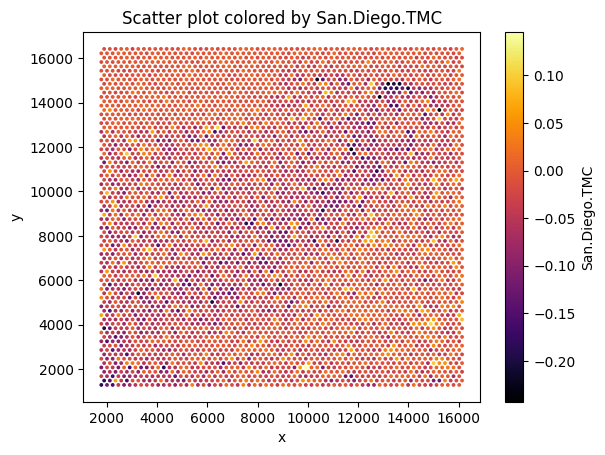

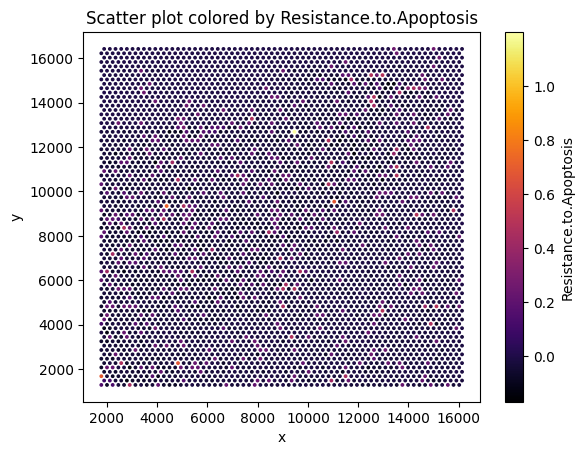

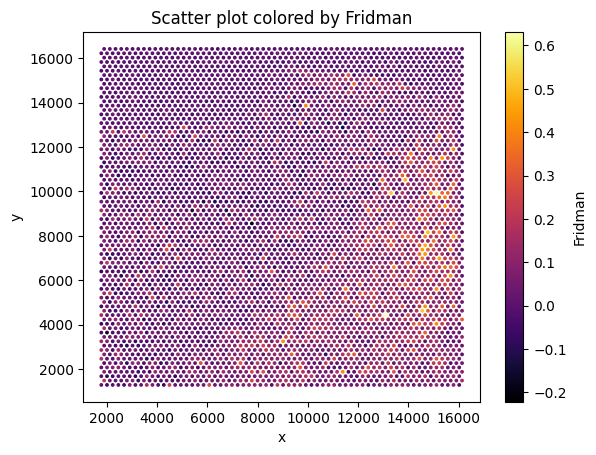

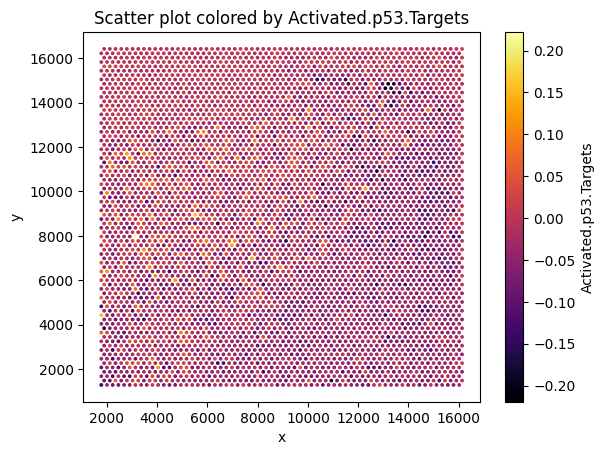

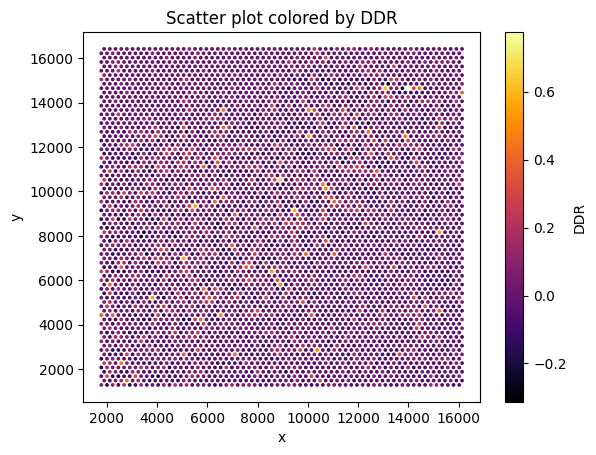

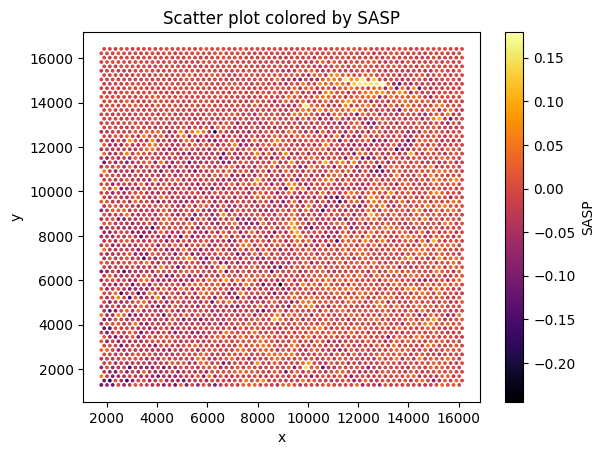

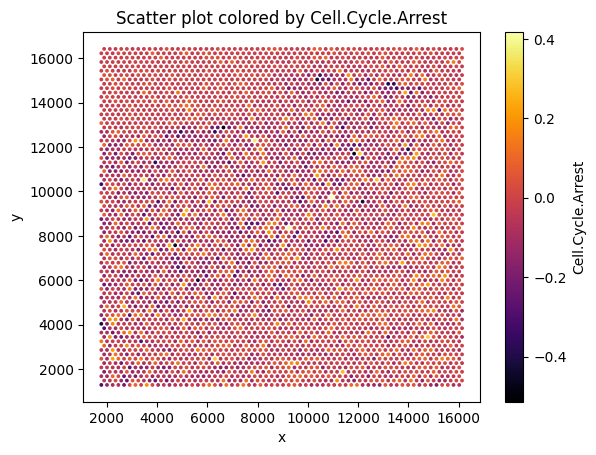

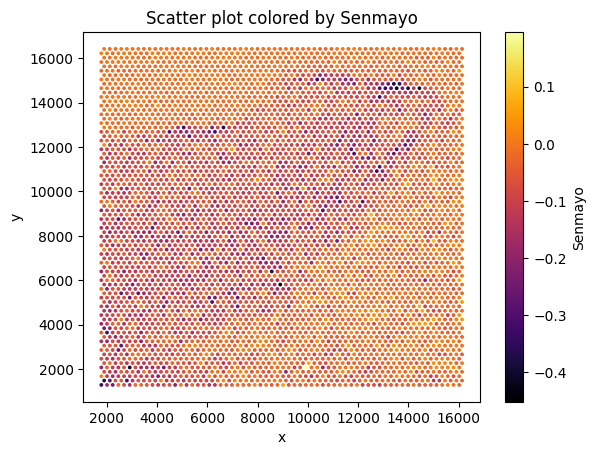

In [125]:
# Columns to use for coloring
color_columns = ['San.Diego.TMC', 'Resistance.to.Apoptosis',
                 'Fridman', 'Activated.p53.Targets', 'DDR', 'SASP', 'Cell.Cycle.Arrest', 'Senmayo']

# Create a series of scatter plots
for color_col in color_columns:
    plt.figure()
    plt.scatter(df['x'], df['y'], c=df[color_col], cmap='inferno', s=3)
    plt.colorbar(label=color_col)
    plt.title(f'Scatter plot colored by {color_col}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

## Plot by mean and variance to identify cells with high mean and low variance

C:\Users\abueckle\AppData\Local\Temp\1\ipykernel_33492\1128914327.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[plot_on_x], df[plot_on_y], alpha=alpha_mapped, color = colors_mapped, cmap='inferno', s=3)


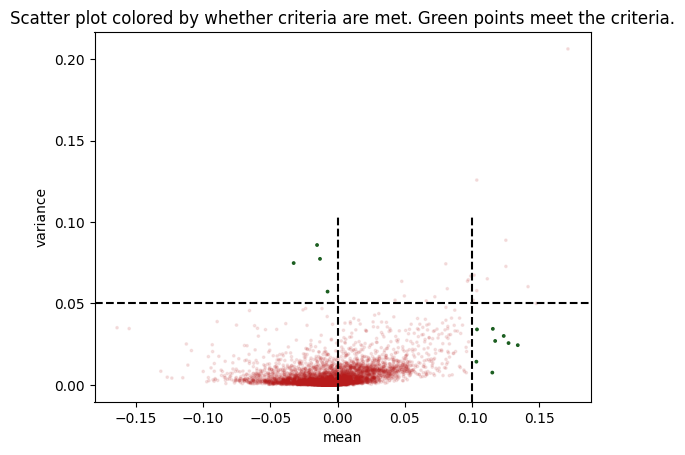

In [164]:
# draw scatter graph of mean vs variance with thresholds
plot_on_x = 'mean'
plot_on_y = 'variance'

# set colors based on thresholds
alpha_mapped = df['meets_thresholds'].map({True: 1, False: 0.1})
colors_mapped = df['meets_thresholds'].map({True: "#1B5E20", False: "#B71C1C"})

plt.figure()
plt.scatter(df[plot_on_x], df[plot_on_y], alpha=alpha_mapped, color = colors_mapped, cmap='inferno', s=3)
plt.title(f'Scatter plot colored by whether criteria are met. Green points meet the criteria.')
plt.xlabel(plot_on_x)
plt.ylabel(plot_on_y)

# add ablines
plt.axhline(y=.05, color='black', linestyle='--', xmax=1)
plt.axvline(x=0, color='black', linestyle='--', ymax=.5)
plt.axvline(x=.1, color='black', linestyle='--', ymax=.5)

plt.show()

In [134]:

# To normalize variance, initialize MinMaxScaler
scaler = MinMaxScaler((0,1))

# Fit and transform the column
df['variance_norm'] = scaler.fit_transform(df[['variance']])
df

barcode      x      y  San.Diego.TMC  \
0     AAACAACGAATAGTTC-1   3590   1281      -0.028666   
1     AAACAAGTATCTCCCA-1  13307  11111      -0.053088   
2     AAACAATCTACTAGCA-1   6641   1871      -0.080499   
3     AAACACCAATAACTGC-1   3929  12881      -0.025482   
4     AAACAGAGCGACTCCT-1  12403   4034       0.005929   
...                  ...    ...    ...            ...   
4987  TTGTTTCACATCCAGG-1   6528  12684      -0.076314   
4988  TTGTTTCATTAGTCTA-1   5172  13077      -0.014153   
4989  TTGTTTCCATACAACT-1   4833  10128      -0.041268   
4990  TTGTTTGTATTACACG-1   6415  15633      -0.002236   
4991  TTGTTTGTGTAAATTC-1   7545   2657      -0.011704   

      Resistance.to.Apoptosis   Fridman  Activated.p53.Targets       DDR  \
0                   -0.062678  0.156891              -0.056996 -0.037538   
1                    0.210114  0.035705              -0.050288 -0.030781   
2                   -0.051282  0.161620              -0.076238 -0.030781   
3                   -0.008547  0.021632              -0.014578  0.188438   
4                   -0.017094  0.025354              -0.059214  0.058746   
...                       ...       ...                    ...       ...   
4987                -0.074074  0.018957              -0.066200  0.008071   
4988                -0.011396  0.021671               0.007124 -0.013514   
4989                -0.031339 -0.021981              -0.011972  0.035098   
4990                -0.002849  0.003179              -0.000827 -0.003378   
4991                -0.039886  0.113200              -0.089250 -0.092905   

          SASP  Cell.Cycle.Arrest   Senmayo      mean  variance     stdev  \
0    -0.016545           0.185525 -0.061099  0.019999  0.010986  0.104814   
1     0.031370          -0.148785 -0.140747 -0.000822  0.012472  0.111679   
2     0.001510          -0.149464 -0.095209 -0.032162  0.009515  0.097546   
3    -0.037329           0.045675 -0.035429  0.024259  0.006045  0.077752   
4    -0.003351          -0.015797 -0.022505 -0.000775  0.001364  0.036933   
...        ...                ...       ...       ...       ...       ...   
4987  0.010723          -0.106612 -0.119121 -0.040778  0.002660  0.051573   
4988 -0.010683          -0.027162 -0.026813 -0.006873  0.000259  0.016096   
4989 -0.020243           0.027734 -0.050374 -0.009139  0.000856  0.029263   
4990 -0.004473          -0.007148 -0.009670 -0.002533  0.000010  0.003202   
4991  0.020195           0.020586 -0.050725 -0.011395  0.005177  0.071951   

      meets_thresholds  variance_norm  
0                False       0.053263  
1                False       0.060469  
2                False       0.046133  
3                False       0.029310  
4                False       0.006613  
...                ...            ...  
4987             False       0.012895  
4988             False       0.001256  
4989             False       0.004152  
4990             False       0.000050  
4991             False       0.025099  

[4992 rows x 16 columns]

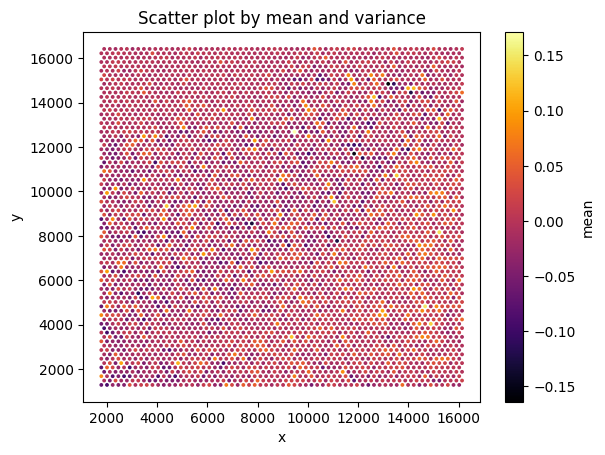

In [137]:
# plot each B with mean and var
plt.figure()
plt.scatter(df['x'], df['y'], c=df['mean'], cmap='inferno', alpha=1-df['variance'], s=3)
plt.colorbar(label='mean')
plt.title(f'Scatter plot by mean and variance')
plt.xlabel('x')
plt.ylabel('y')
plt.show()